# Introduction to Regression with Neural Network in TensorFlow

There are many defination for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# import tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
tf.__version__

'2.5.0'

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Creating data to view and fit

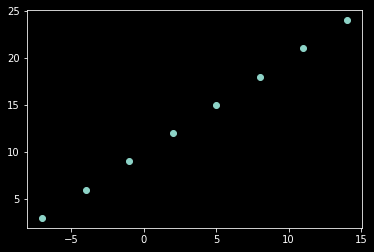

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# Create Features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

In [ ]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
x[0], y[0]

(-7.0, 3.0)

In [ ]:
x[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
x[0].ndim

0

In [ ]:
x[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy array into tensors
x = tf.constant(x)
y = tf.constant(y)
x.shape, y.shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

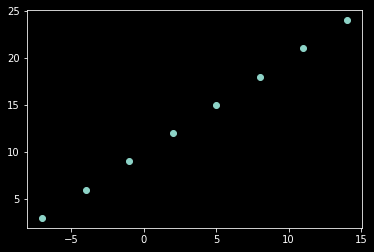

In [ ]:
plt.scatter(x, y)

## Steps in modelling with TensorFlow

1. **Creating a model -** define the input and outdat layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model -** define the loss function (in others words, the function which tells our model how wrong it is) the optimizer (tells our model how to improve the patterns it's learning) and evalution metrics (what we can use to interpret the performance of our model).
3. **Fitting a model -** letting the model try to find patterns between x and y (features and labels).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=['mae'])

# 3. Fit the model
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the setps we took to create a model.

1. **Creating a model -** ere we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation of each layer.
2. **Compiling a model -** here we might change the optimization function or perhaps function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model -** here we might fit a model for more **epochs** (leave it training for longer) or on more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll tarin for longer)
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 205ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 3

In [ ]:
# Remind ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's see if our model prediction has improved...
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
# Let's rebuilt our model

# 1. Crete yhe model (this time add one "hidden layer")
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model (this time we'll train for longer)
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 247ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [ ]:
# let's predict the value
model.predict([17.0])

array([[31.223133]], dtype=float32)

In [ ]:
# Let's rebuilt a model

# 1. Create a model (this time I add two hidden layyer)
model =  tf.keras.Sequential([
                              tf.keras.layers.Dense(100, activation='relu'),
                              tf.keras.layers.Dense(100, activation='relu'),
                              tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. FIt the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 287ms/step - loss: 13.2879 - mae: 13.2879
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.6519 - mae: 12.6519
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 12.0066 - mae: 12.0066
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.3415 - mae: 11.3415
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 10.6548 - mae: 10.6548
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 9.9252 - mae: 9.9252
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.1130 - mae: 9.1130
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.1750 - mae: 8.1750
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 7.1739 - mae: 7.1739
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 5.9778 - mae: 5.9778
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - l

In [ ]:
# predict the value
model.predict([17.0])

array([[31.602211]], dtype=float32)

In [ ]:
# Let's rebuilt model

# 1. create a model (this time three hidden layer)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 280ms/step - loss: 13.2765 - mae: 13.2765
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 12.8401 - mae: 12.8401
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.4224 - mae: 12.4224
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9746 - mae: 11.9746
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5099 - mae: 11.5099
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9818 - mae: 10.9818
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.3517 - mae: 10.3517
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 9.5581 - mae: 9.5581
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 8.5426 - mae: 8.5426
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.2063 - mae: 7.2063
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

In [ ]:
# predict the value
model.predict([17.0])

array([[32.410076]], dtype=float32)

In [ ]:
# Let's rebuilt the model

# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model (this time change optimizer "SGD" to "Adam")
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 474ms/step - loss: 13.0605 - mae: 13.0605
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6917 - mae: 12.6917
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3131 - mae: 12.3131
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9290 - mae: 11.9290
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 11.5378 - mae: 11.5378
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1416 - mae: 11.1416
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7317 - mae: 10.7317
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 10.3690 - mae: 10.3690
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0458 - mae: 10.0458
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7054 - mae: 9.7054
Epoch 11/100
1/1 [==============================] - 0s 4ms/

In [ ]:
# predict the value
model.predict([17.0])

array([[30.972374]], dtype=float32)

In [ ]:
# let's rebuilt the model

# 1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model (this time optimizer "Adam" value set "learning_rate=0.0001")
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['mae'])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 335ms/step - loss: 12.3137 - mae: 12.3137
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2685 - mae: 12.2685
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 12.2232 - mae: 12.2232
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 12.1781 - mae: 12.1781
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 12.1340 - mae: 12.1340
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0905 - mae: 12.0905
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.0472 - mae: 12.0472
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 12.0038 - mae: 12.0038
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9603 - mae: 11.9603
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9168 - mae: 11.9168
Epoch 11/100
1/1 [==============================] - 0s 6m

In [ ]:
# predict the value
model.predict([17.0])

array([[18.775728]], dtype=float32)

In [ ]:
# Let's rebuilt the model

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 289ms/step - loss: 14.6943 - mae: 14.6943
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.9952 - mae: 13.9952
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3017 - mae: 13.3017
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.6121 - mae: 12.6121
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.9240 - mae: 11.9240
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2345 - mae: 11.2345
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5401 - mae: 10.5401
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8381 - mae: 9.8381
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.1255 - mae: 9.1255
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.3998 - mae: 8.3998
Epoch 11/100
1/1 [==============================] - 0s 6ms/step

In [ ]:
# predict the value
model.predict([17.0])

array([[27.414919]], dtype=float32)

# *Common ways to improves a deep model:*

* **Adding layers**
* **Increase the number of hidden unit**
* **Change the activation function**
* **Change the optimization function**
* **Change the learning rate**
* **Fitting aon more data**
* **Fitting for longer**

## Evaluting a model

In practise, a typical workflow you'll go through when building neural networks is: 

```
Build a model  -> fit it  -> Evaluate it  -> tweek a model  -> fit it  -> evaluate it  -> tweak a model  -> fit it  -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

1. The data
 * What data are we working with?
 * What does it look like?
2. The model itself
 * What does our model look like?
3. The training of a model
 * how does a model perform while it learns?
4. the prediction of the model
 * how do the prediction of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# make labels for a dataset
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Convernt dtype formate into "float32"
x = tf.cast(x, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)
x, y

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.,  70.,  74.,  78.,  82.,
         86.,  90.,  94.,  98., 102., 106.], dtype=float32)>)

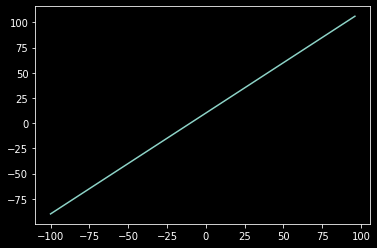

In [ ]:
# Visualize the data
plt.style.use('dark_background')
plt.plot(x, y)

### The 3 sets...
* **Training set**
 * The model learns from this data, which is typically 70-80% of total data you have available.
* **Validation set**
 * The model gets tuned from this data, which is typically 10-15% of the data you have available.
* Test set
 * The model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(x), len(y)

(50, 50)

In [ ]:
# Split the data into train and test set
x_train = x[:40] # First 40 are training samples (80% of the data)
x_test = x[40:] # last 10 are testing samples (20% of the data)
y_train = y[:40]
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualing the data

Now we've got our data in traing and test sets... let's visualize it again !

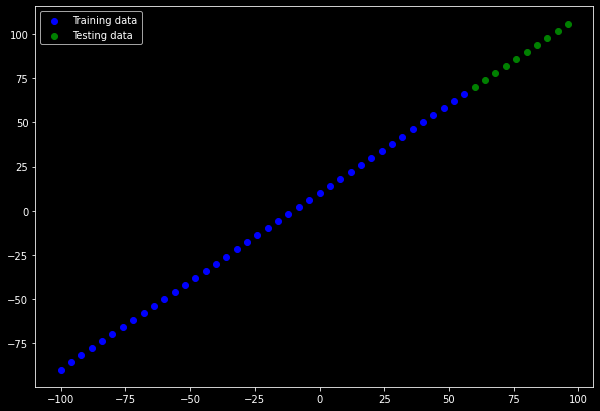

In [ ]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(x_train, y_train, c='b', label='Training data')

# Plot testing data in green
plt.scatter(x_test, y_test, c='g', label='Testing data')
plt.legend()

In [ ]:
# Let's have a look at how to build a neural network for our data 

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# # 3. Fit the model
# model.fit(x_train, y_train, epochs=100)

### Visulizing the model

In [ ]:
# model.summary()

In [ ]:
# Let's Create a model which automatically by definding the input_shape arguments is the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
                             tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# 2. compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params:
 * Total number of parameters in the model.
* Trainable params:
 * These are parameters (patterns) the models can update as it trains.
* Non-trainable params:
 * These parameters aren't upadated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**.

In [ ]:
model.fit(x_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


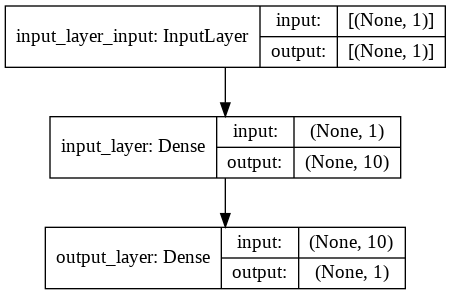

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model prediction

To visualize predictions, it's a good idea against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predicions 
y_pred = model.predict(x_test)
y_pred

array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

**Note :** If you feel like you're going to reuse some kind of functionality in the future,it's good idea to turn itto a function.

In [ ]:
# Let's create a ploting function
def plot_prediction(train_data=x_train, 
                    train_labels=y_train,
                    test_data=x_test,
                    test_labels=y_test,
                    predictions=y_pred):
  '''
  Plots training data, test data and compare predictions to ground truth
  '''
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing_data')
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # show the legend
  plt.legend()

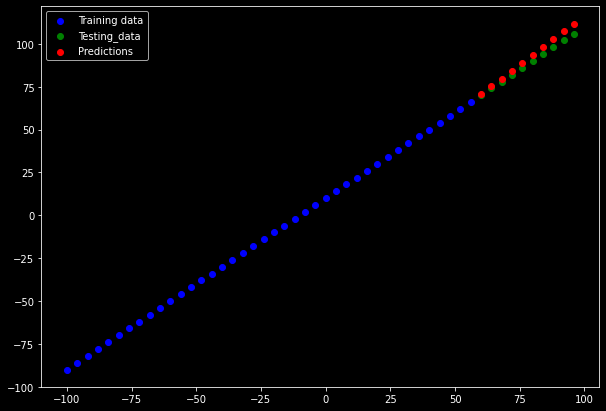

In [ ]:
plot_prediction()

### Evalution our model's prediction with regression evalution metrics

Depending problem you're working on, there will be different valution metrics to evaluate your models performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my models predictions"
* MSE - mean squared error, "square the average errors" 

In [ ]:
# Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 107ms/step - loss: 3.1969 - mae: 3.1969


[3.196946620941162, 3.196946620941162]

In [ ]:
# Calculate of mean absolute error
tf.metrics.mean_absolute_error(y_true=y_test,
                               y_pred=tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558247, 14.116051, 11.708944, 10.336927, 10.      , 10.698161,
       12.447118, 15.333008, 19.253975, 23.841705], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55219 ],
       [ 75.139915],
       [ 79.72764 ],
       [ 84.31536 ],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66626 ],
       [107.253975],
       [111.841705]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55219 ,  75.139915,  79.72764 ,  84.31536 ,  88.90308 ,
        93.49081 ,  98.07853 , 102.66626 , 107.253975, 111.841705],
      dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [ ]:
np.mean(np.abs(y_test - tf.squeeze(y_pred)))

3.1969466

In [ ]:
# Calculate the mean sequred error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

In [ ]:
np.mean(np.square(y_test - tf.squeeze(y_pred)))

13.070173

In [ ]:
# Calculate the hubber
huber = tf.keras.losses.huber(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))
huber

<tf.Tensor: shape=(), dtype=float32, numpy=2.7069733>

In [ ]:
# Make some function to reuse MAE and MSE
def mae(y_true=y_test, y_pred=y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true=y_test, y_pred=y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [ ]:
mae()

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>

In [ ]:
mse()

<tf.Tensor: shape=(), dtype=float32, numpy=13.070175>

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```
1. Get more data
 * Get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger(using more complex model)
 * This might come in the form of more layers or more hidden units in each layer. 
3. Train for longer
 * Give your model more of a chance to find patterns in the data.

Let's do 3 modelling expriments:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4` - 
5. `model_5` -

**Build** `model_1`

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

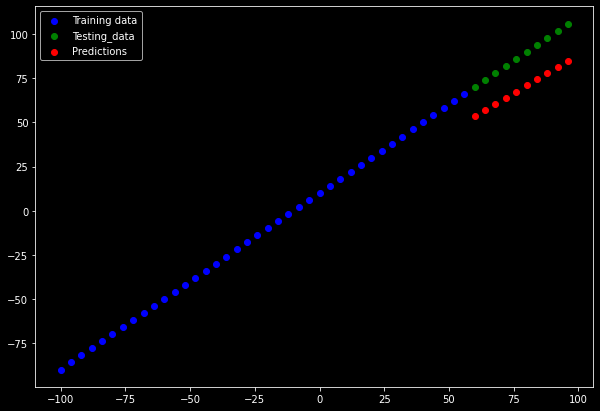

In [ ]:
# Make and plot prediction for model_1
y_preds_1 = model_1.predict(x_test)
plot_prediction(predictions=y_preds_1)

In [ ]:
# Create model_1 evalution metrics
mae_1 = mae(y_pred=y_preds_1)
mse_1 = mse(y_pred=y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Lets build another model_2

# 1. Create the model_2
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/100
2/2 [==========================

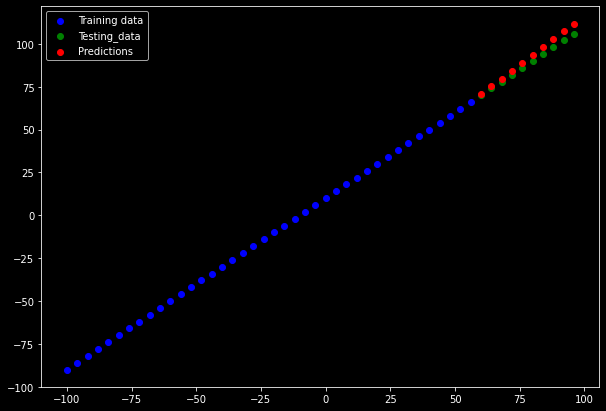

In [ ]:
# Make and plot prediction for model_2
y_preds_2 = model_2.predict(x_test)
plot_prediction(predictions=y_preds_2)

In [ ]:
# Create model_2 evalution metrics
mae_2 = mae(y_pred=y_preds_2)
mse_2 = mse(y_pred=y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

**Build `model_3`**
* 2 layers, for 500 epochs

In [ ]:
# set the random seed
tf.random.set_seed(42)

# Let's make model_3

# 1. Create the model_3
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model_3
model_3.fit(x_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 5ms/

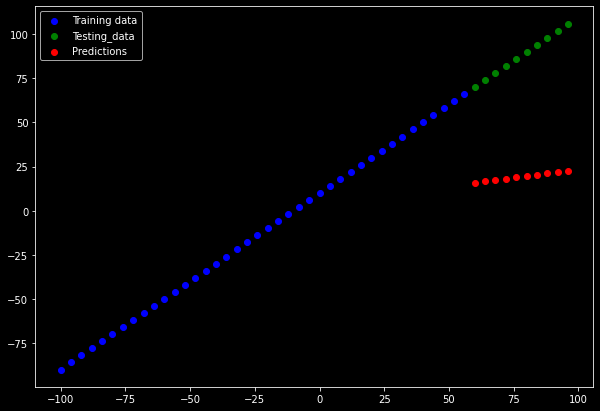

In [ ]:
# Make and plot prediction for model_3
y_preds_3 = model_3.predict(x_test)
plot_prediction(predictions=y_preds_3)

In [ ]:
# Create model_e evalution metrics
mae_3 = mae(y_pred=y_preds_3)
mse_3 = mse(y_pred=y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

## Comparing the result of our experiments

We're run a few experiments let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196947,13.070175
2,model_3,68.713623,4808.028320


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> **Note :** One of your main goles should be to minimize the time between your experiments. The more expriments you do, the more things you'll figure out which don't work in turn, get closer to figureing out what does work. Remember the machine learining practioner's motto: *experiment, experiment, experiment, experiment, experiment...*.

## Tracking your experiments

one really good habit in machine learning modelling is to track the results of your experiments.

And when doing so , it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us !

**Resource:** A you build more models, you'll want to took into using:
* TensorBoard - a component of the tensorflow library to help track modeling experiments (we'll see this one later).
* Weights & Biases - a tool for trecking all kind of machine learning experiments: (plugs straight into TensorBoard).

## Saving our models

Saving our model allows us to use them outside of Google CoLab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The `SavedModel` format
2. The `HDF5` format

In [ ]:
# Save model using the SavedModel format
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using the  HDF5 format
model_2.save('best_model_HDF5_format.h5')

## Loding in a save model 

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel fromat model predictions 
model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check to save if loaded .h5 model prediction match model_2
loaded_h5_model_preds = loaded_h5_model.predict(x_test)

(loaded_SavedModel_format_preds == loaded_h5_model_preds) == (model_2_preds == loaded_h5_model_preds)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file format) from Google Colab

I fyou want to download your file from Google Colab;
1. You can go to the `Files` tab and right click on the file you're after and *download*.
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab 
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab Notebooks/tensorflow_course

cp: target 'Notebooks/tensorflow_course' is not a directory


In [ ]:
!ls /content/drive/MyDrive/Colab Notebooks/tensorflow_course

ls: cannot access '/content/drive/MyDrive/Colab': No such file or directory
ls: cannot access 'Notebooks/tensorflow_course': No such file or directory


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [ ]:
# Read in the insurance dataset 
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# deep copy of original dataset
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Check Null value in DataFrame
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Let's try One-Hot encoder our DataFrame so it's all number
df_one_hot = pd.get_dummies(df)
df_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create x & y values (features and labels)
x = df_one_hot.drop(columns='charges')
y = df_one_hot['charges']

x.shape, y.shape

((1338, 11), (1338,))

In [ ]:
# Create training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Check all data size
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [ ]:
# Run the model 

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 951us/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 991us/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7493.1743 - mae: 7493.

In [ ]:
# Check the results of the model on the test data
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Right now it looks like our model isn't performing too well... let's try and improve it !

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs) 
3. (insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model_2
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model_2
model_2.fit(x_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluate the larger model
model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model_3 
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model_3
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model_3
history = model_3.fit(x_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
# Evaluat our model_3 
model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

In [ ]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

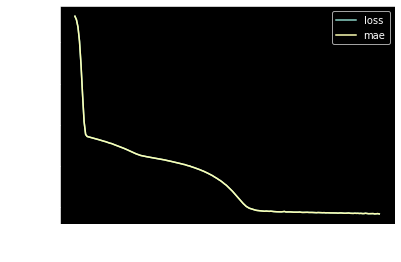

In [ ]:
# Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


**Question:** How long should you train for ?

It deoends... It's depends on the problem you're working on. However, many people asked this question before... so tensorflow has a solution It's called the [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and staderlization)

In terms of scaleing values, nural networks tend to prefere normalization.

If you not sure on which to, you could try both and see which perform better.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in insurance dataframe
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
# make deep copy
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


To preprare our data, we can borrow  a few classes from sklearn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# create a columns transormer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children', ]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

ct

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [ ]:
# create x and y
x = df.drop(columns='charges')
y = df['charges']

# Check shape
x.shape, y.shape

((1338, 6), (1338,))

In [ ]:
# Build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Check each shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

In [ ]:
# Fit the column transformer to our training data
ct.fit(x_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

In [ ]:
# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
# What does our data looks like now?
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
x_train_normal.shape

(1070, 11)

Our data has been normalized and onehotencoded.

Let's build Nenural network model on it

In [ ]:
# Build neural network model to fit on our normalize data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])

# 2. compile the model
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# Fit the model
model_4.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 11925.96

In [ ]:
model_4.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]